In [1]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 1us/step


In [0]:
def vectorizer(sequences, dimension=10000):
  data = np.zeros(shape=(len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    data[i,sequence] = 1
  return data

In [0]:
training_set, testing_set = vectorizer(x_train), vectorizer(x_test)

In [0]:
#Here we use one-hot encoding as technique for encoding labels
training_labels, testing_labels = to_categorical(y_train), to_categorical(y_test)

In [0]:
val_set = training_set[:1000]
val_label = training_labels[:1000]
remaining_set = training_set[1000:]
remaining_labels = training_labels[1000:]

In [7]:
model = Sequential()
model.add(Dense(64, activation="relu",input_shape=(10000,)))
model.add(Dense(64,activation="relu"))
model.add(Dense(46,activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["acc"])

In [9]:
model_history = model.fit(remaining_set,remaining_labels,epochs=20,batch_size=256,validation_data=(val_set,val_label))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 403us/step - loss: 2.1195 - acc: 0.5568 - val_loss: 1.4351 - val_acc: 0.6750
Epoch 2/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.1798 - acc: 0.7434 - val_loss: 1.1631 - val_acc: 0.7480
Epoch 3/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.8584 - acc: 0.8140 - val_loss: 1.0839 - val_acc: 0.7550
Epoch 4/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.6421 - acc: 0.8612 - val_loss: 0.9502 - val_acc: 0.7960
Epoch 5/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.4811 - acc: 0.8963 - val_loss: 0.9086 - val_acc: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.3647 - acc: 0.9213 - val_loss: 0.9584 - val_acc: 0.7920
Epoch 7/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.2869 - acc: 0.

In [0]:
#instead of using tensorboardcolab let's plot the accuracy and the loss manually
history = model_history.history
epochs = range(1,len(history['acc'])+1)

Text(0, 0.5, 'Loss')

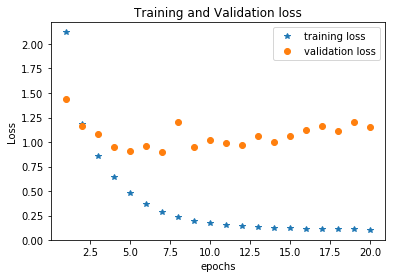

In [11]:
plt.plot(epochs,history['loss'],'*',label="training loss")
plt.plot(epochs,history['val_loss'],'o',label="validation loss")
plt.legend()
plt.title("Training and Validation loss")
plt.xlabel("epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

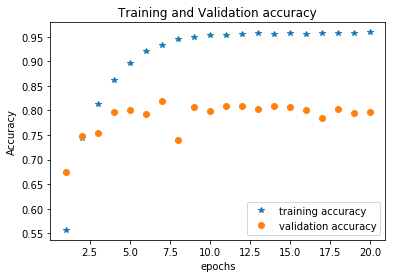

In [12]:
plt.plot(epochs,history['acc'],'*',label="training accuracy")
plt.plot(epochs,history['val_acc'],'o',label="validation accuracy")
plt.legend()
plt.title("Training and Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")